In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
# Font settings
plt.rcParams['font.size'] = 12                # Default font size for text
plt.rcParams['font.family'] = 'serif'         # Font family for text

# Figure settings
plt.rcParams['figure.figsize'] = (8, 6)       # Default figure size (width, height in inches)
plt.rcParams['figure.dpi'] = 100              # Resolution of the figure in dots per inch

# Axes settings
plt.rcParams['axes.grid'] = True              # Turn on/off gridlines by default
plt.rcParams['axes.titlesize'] = 20           # Font size of the plot titles
plt.rcParams['axes.labelsize'] = 16           # Font size of the x and y labels
plt.rcParams['axes.linewidth'] = 1.5          # Line width of the axes

# Tick settings
plt.rcParams['xtick.labelsize'] = 12          # Font size for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 12          # Font size for y-axis tick labels
plt.rcParams['xtick.major.size'] = 6          # Size of major ticks on x-axis
plt.rcParams['ytick.major.size'] = 6          # Size of major ticks on y-axis

# Line settings
plt.rcParams['lines.linewidth'] = 2.0         # Line width for plot lines
plt.rcParams['lines.markersize'] = 6          # Marker size for plot markers

# Legend settings
plt.rcParams['legend.fontsize'] = 12          # Font size for legend text
plt.rcParams['legend.loc'] = 'best'           # Default location for legends

# Save settings
plt.rcParams['savefig.dpi'] = 300             # DPI for saved figures
plt.rcParams['savefig.bbox'] = 'tight'        # Adjust layout when saving figures

# Grid settings
plt.rcParams['grid.color'] = 'gray'           # Color of gridlines
plt.rcParams['grid.linestyle'] = '--'         # Line style for gridlines
plt.rcParams['grid.linewidth'] = 0.5          # Line width for gridlines
# import seaborn as sns
from scipy import stats

In [26]:
# read DEWDROP data 
dewdrop_v1 = [pd.read_csv(f"logs/dewdrop_bs=100_round={i}_v1.csv") for i in range(10)][:10]
# dewdrop_v2 = [pd.read_csv(f"logs/dewdrop_bs=50_round={i}_v2.csv") for i in range(10)]
# dewdrop_v3 = [pd.read_csv(f"logs/dewdrop_bs=50_round={i}_v3.csv") for i in range(10)]

dewdrop_loss_v1 = np.array([df['test_loss'].min() for df in dewdrop_v1])
# dewdrop_loss_v2 = np.array([df['test_loss'].min() for df in dewdrop_v2])
# dewdrop_loss_v3 = np.array([df['test_loss'].min() for df in dewdrop_v3])
avg_dewdrop_loss = np.stack([
    dewdrop_loss_v1, 
    # dewdrop_loss_v2, 
    # dewdrop_loss_v3
]).mean(axis=0)

In [27]:
# read BADGE data 
badge_v1 = [pd.read_csv(f"logs/badge_bs=100_round={i}_v1.csv") for i in range(10)][:10]
# badge_v2 = [pd.read_csv(f"logs/badge_bs=50_round={i}_v2.csv") for i in range(10)]
# badge_v3 = [pd.read_csv(f"logs/badge_bs=50_round={i}_v3.csv") for i in range(10)]
badge_loss_v1 = np.array([df['test_loss'].min() for df in badge_v1])
# badge_loss_v2 = np.array([df['test_loss'].min() for df in badge_v2])
# badge_loss_v3 = np.array([df['test_loss'].min() for df in badge_v3])
avg_badge_loss = np.stack([
    badge_loss_v1, 
    # badge_loss_v2, 
    # badge_loss_v3
]).mean(axis=0)

In [28]:
# read KMEANS data 
kmeans_v1 = [pd.read_csv(f"logs/kmeans_bs=100_round={i}_v1.csv") for i in range(10)][:10]
# kmeans_v2 = [pd.read_csv(f"logs/kmeans_bs=50_round={i}_v2.csv") for i in range(10)]
# kmeans_v3 = [pd.read_csv(f"logs/kmeans_bs=50_round={i}_v3.csv") for i in range(10)]
kmeans_loss_v1 = np.array([df['test_loss'].min() for df in kmeans_v1])
# kmeans_loss_v2 = np.array([df['test_loss'].min() for df in kmeans_v2])
# kmeans_loss_v3 = np.array([df['test_loss'].min() for df in kmeans_v3])
avg_kmeans_loss = np.stack([
    kmeans_loss_v1,
    # kmeans_loss_v2, 
    # kmeans_loss_v3
]).mean(axis=0)

In [29]:
# read RANDOM data 
random_v1 = [pd.read_csv(f"logs/random_bs=100_round={i}_v1.csv") for i in range(5)][:10]
# random_v2 = [pd.read_csv(f"logs/random_bs=50_round={i}_v2.csv") for i in range(10)]
# random_v3 = [pd.read_csv(f"logs/random_bs=50_round={i}_v3.csv") for i in range(10)]
random_loss_v1 = np.array([df['test_loss'].min() for df in random_v1])
# random_loss_v2 = np.array([df['test_loss'].min() for df in random_v2])
# random_loss_v3 = np.array([df['test_loss'].min() for df in random_v3])
avg_random_loss = np.stack([
    random_loss_v1, 
    # random_loss_v2, 
    # random_loss_v3
]).mean(axis=0)

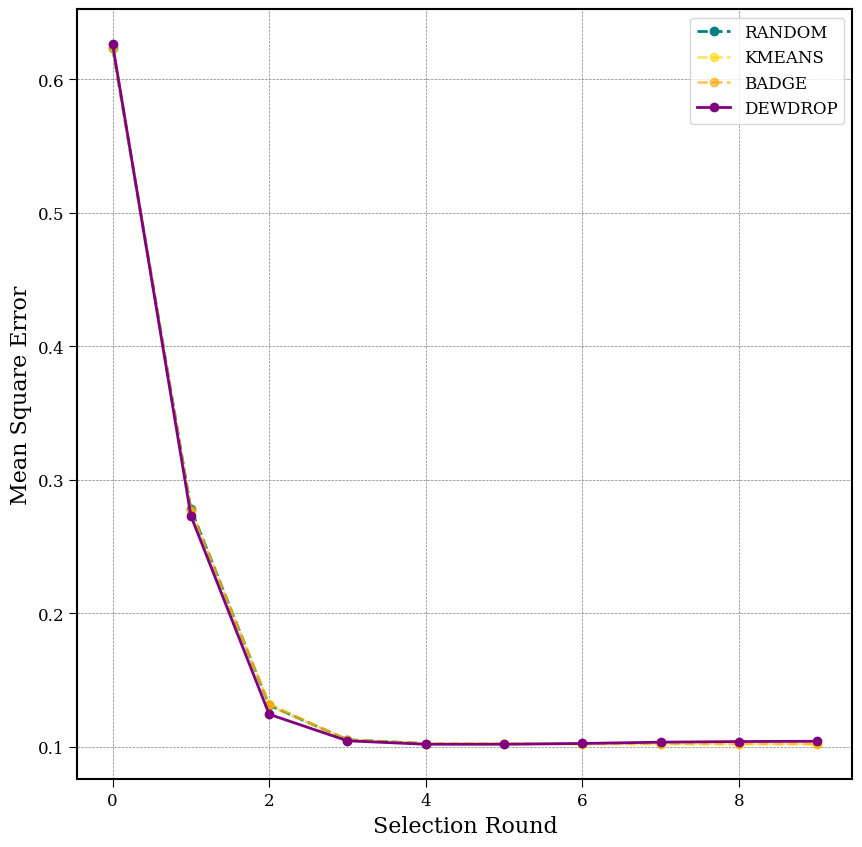

In [30]:
plt.figure(figsize=(10,10))
plt.xlabel("Selection Round")
plt.ylabel("Mean Square Error")
plt.plot(avg_random_loss, label='RANDOM', color="#008080", marker='o', linestyle='dashed')
plt.plot(avg_kmeans_loss, label='KMEANS', color='#FFD700', alpha=0.6, marker='o', linestyle='dashed')
plt.plot(avg_badge_loss, label='BADGE', color='#FFA500', alpha=0.6, marker='o', linestyle='dashed')
plt.plot(avg_dewdrop_loss, label='DEWDROP', color="purple", marker='o')
plt.legend()
plt.show()

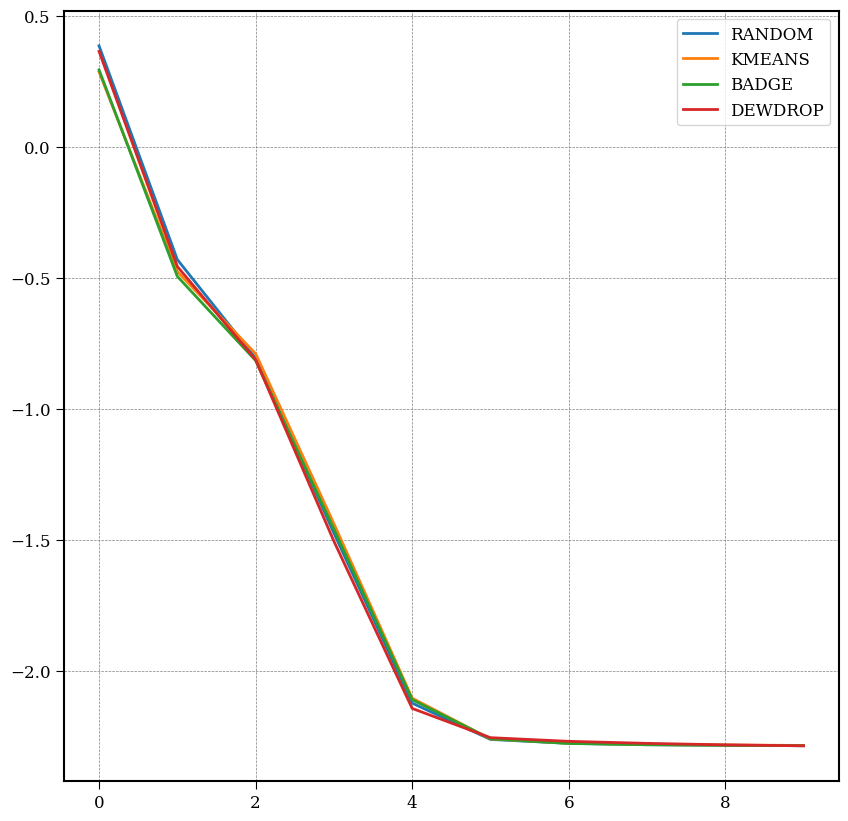

In [13]:
plt.figure(figsize=(10,10))
plt.plot(np.log(avg_random_loss), label='RANDOM')
plt.plot(np.log(avg_kmeans_loss), label='KMEANS')
plt.plot(np.log(avg_badge_loss), label='BADGE')
plt.plot(np.log(avg_dewdrop_loss), label='DEWDROP')
plt.legend()
plt.show()